<a href="https://colab.research.google.com/github/Homedepot5/DataScience/blob/origin%2Ffeature%2Fdevelopment/Logistic_Regression_HR_Employe_retentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import files
import io

In [21]:
uploaded=files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (1).csv


In [37]:
df=pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [41]:
left=df[df.left==1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [42]:
retained=df[df.left==0]
retained

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


**Data Exploration and Visualization**

In [46]:
m=df.groupby('left').mean()
m

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


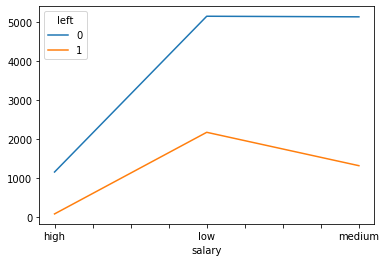

In [48]:
pd.crosstab(df.salary,df.left).plot(kind='line')

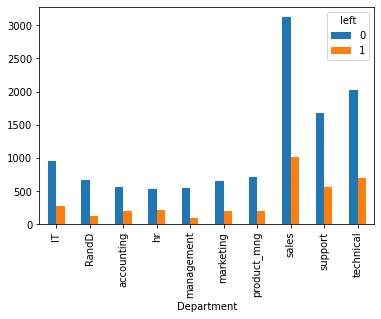

In [49]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [50]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [53]:
dumies=pd.get_dummies(subdf.salary)
dumies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [83]:
final=pd.concat([subdf,dumies],axis=1)
final

,satisfaction_level,high,low,medium
0,0.38,0,1,0
1,0.80,0,0,1
2,0.11,0,0,1
3,0.72,0,1,0
4,0.37,0,1,0
...,...,...,...,...
14994,0.40,0,1,0
14995,0.37,0,1,0
14996,0.37,0,1,0
14997,0.11,0,1,0


In [65]:
out=final.drop('salary',axis=1)
out

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [72]:
y=df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(out,y,train_size=0.9)


In [102]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
14260,0.43,147,0,0,1,0
10491,0.42,108,0,0,1,0
10138,0.91,123,0,0,1,0
9409,0.63,265,0,0,1,0
9546,0.95,137,0,0,0,1
...,...,...,...,...,...,...
13789,0.76,222,0,1,0,0
11464,0.49,155,1,0,1,0
12598,0.37,157,0,0,1,0
6974,0.62,172,0,0,0,1


In [103]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [104]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0])

In [106]:
model.score(X_test,y_test)

0.7786666666666666